<h1>Analisis Exploratorio de Datos (EDA).</h1>

<h2>1. Listado de Variables y Selección.</h2>

El dataset que utilizaremos esta constituido con un total de 3000 filas x 16 columnas, que muestran por cada paciente(de género: F o M, y Edad) un conjunto de síntomas y actividades que poseen, toda esta informacion se encuentra en el archivo dataset "Lung_Cancer.csv"

<h3>Variables de Entrada.</h3>

Consideraremos para este Trabajo: 1 = **SI**, 0 = **NO**.

- **Gender:** Género del paciente, Actualmente (F: Femenino, M: Masculino), **lo vamos a reconvertir** (1: Masculino, 0: Femenino).
- **Age:** Edad del paciente.
- **Smoking:** Si el paciente es un fumador habitual.
- **Yellow_Fingers:** Si el paciente posee el síntoma de *Dedos Amarillos.*
- **Anxiety:** Si el paciente posee el síntoma de *Ansiedad.*
- **Peer_Pressure:** Si el paciente sufre de *Presión* por fumar o tomar alcohol.
- **Chronic_Disease:** Si el paciente sufre de algun tipo de enfermedad crónica.
- **Fatigue:** Si el paciente experimenta *Fatiga.*
- **Allergy:** Si el paciente sufre de algún tipo de *Alergia.*
- **Wheezing:** Si se oye algún tipo de sonido agudo en la respiración del paciente.
- **Alcohol_Consuming:** Si el paciente es alcoholico.
- **Coughing:** Si el paciente presenta *Tos.*
- **Shortness_Of_Breath:** Si el paciente posee dificultad para respirar.
- **Swallowing_Dificulty:** Si el paciente posee dificultad para tragar.
- **Chest_Pain:** Si el paciente padece de dolor en el pecho.

<h3>Variable de Salida.</h3>

Nuestra variable de salida será **LUNG_CANCER:** El diagnóstico final sobre la presencia de Cáncer de Pulmón, Actualmente (YES, NO), **lo vamos a reconvertir** (1: SI, 0: NO). Con esta variable vamos a predecir si un paciente posee Cáncer de Pulmón o no. 

<h3>Variables que no se Utilizarán.</h3>

Utilizaremos todas las variables ya que no creemos que haya alguna que no afecte al resultado.

In [448]:
# Importamos las dependencias necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import sklearn_pandas
from matplotlib import gridspec
import pytz
import random
import os

In [449]:
# Importamos el dataset.
dataset = pd.read_csv('Lung_Cancer.csv',encoding='UTF-8')

dataset.sample(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
342,M,66,1,1,2,1,2,2,1,1,2,1,1,1,2,YES
525,M,63,2,1,1,2,1,2,1,1,1,2,2,2,1,NO
1030,M,59,1,2,1,2,2,1,2,1,1,2,2,1,1,YES
2688,F,60,1,1,1,1,1,1,1,2,1,1,2,1,1,YES
2560,M,77,1,2,2,2,2,1,2,1,2,2,1,2,1,YES


In [450]:
# Tipo de datos y dimensiones del Dataset.
dataset.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC_DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL_CONSUMING         int64
COUGHING                  int64
SHORTNESS_OF_BREATH       int64
SWALLOWING_DIFFICULTY     int64
CHEST_PAIN                int64
LUNG_CANCER              object
dtype: object

In [451]:
# Filas x Columnas.
dataset.shape

(3000, 16)

<h2>2. Análisis detallado de un conjunto de variables.</h2>

<h3>a. Comportamiento de la variable de Salida.</h3>

In [452]:
# Reconvertimos el género y todos los demas datos a valores enteros: (1: Masculino, 0: Femenino). (1: SI, 0: NO).
data = dataset.copy()
data['GENDER'] = data.GENDER.map({'M' : 1, 'F' : 0})
data['SMOKING'] = data.SMOKING.map({1 : 0, 2 : 1})
data['YELLOW_FINGERS'] = data.YELLOW_FINGERS.map({1 : 0, 2 : 1})
data['ANXIETY'] = data.ANXIETY.map({1 : 0, 2 : 1})
data['PEER_PRESSURE'] = data.PEER_PRESSURE.map({1 : 0, 2 : 1})
data['CHRONIC_DISEASE'] = data.CHRONIC_DISEASE.map({1 : 0, 2 : 1})
data['FATIGUE'] = data.FATIGUE.map({1 : 0, 2 : 1})
data['ALLERGY'] = data.ALLERGY.map({1 : 0, 2 : 1})
data['WHEEZING'] = data.WHEEZING.map({1 : 0, 2 : 1})
data['ALCOHOL_CONSUMING'] = data.ALCOHOL_CONSUMING.map({1 : 0, 2 : 1})
data['COUGHING'] = data.COUGHING.map({1 : 0, 2 : 1})
data['SHORTNESS_OF_BREATH'] = data.SHORTNESS_OF_BREATH.map({1 : 0, 2 : 1})
data['SWALLOWING_DIFFICULTY'] = data.SWALLOWING_DIFFICULTY.map({1 : 0, 2 : 1})
data['CHEST_PAIN'] = data.CHEST_PAIN.map({1 : 0, 2 : 1})
data.LUNG_CANCER = data.LUNG_CANCER.map({'YES': 1, 'NO': 0})
data.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
1463,1,39,0,1,1,0,0,1,1,0,1,0,0,0,0,0
1279,1,74,0,1,1,0,0,1,0,0,0,1,1,1,1,1
2729,1,44,1,0,1,0,0,0,0,0,1,1,1,0,0,1
1940,0,50,1,0,1,1,1,0,0,0,0,0,1,0,1,1
177,0,54,1,1,0,1,0,1,0,0,0,1,1,0,0,0
2057,0,73,1,1,1,1,0,0,0,0,0,0,0,0,1,0
2378,1,36,0,0,0,0,0,1,0,0,0,1,1,0,1,0
2847,1,54,0,1,0,0,1,0,0,1,1,1,1,1,0,1
1680,1,48,1,1,1,0,0,0,0,0,0,1,1,1,0,0
2355,1,58,1,1,0,1,1,0,0,0,1,0,1,1,0,0


<Axes: ylabel='count'>

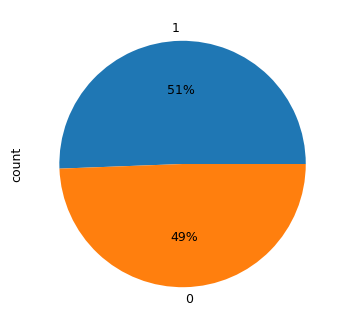

In [453]:
# Graficamos la distribución de la variable de salida.
data.LUNG_CANCER.value_counts().plot.pie(autopct='%1.0f%%',figsize=(4,4))

Podemos observar que el dataset se encuentra balanceado en cuanto a la cantidad de pacientes que poseen cancer de pulmón. Vemos que el 51% de los pacientes cuentan con un diagnóstico positivo de cáncer de pulmon, mientras que el otro 49% no, ésta es una relación muy pareja, 50/50.

<h3>b. Análisis individual de cada variable de entrada.</h3>

**Variable: Gender.** 

Nuestro conjunto de datos esta compuesto a grandes rasgos por un 50% de Hombres (1514) y un 50% de Mujeres (1486).

In [454]:
# Graficamos la distribución de la variable de entrada "Gender".
px.histogram(dataset, x='GENDER', title = 'Distribución')

In [455]:
# Graficamos la relación entre la variable de entrada y la de salida. 
# 1: Masculino, 2: Femenino.
# Naranja: Positivo, Lila: Negativo.
px.histogram(data, x='GENDER', color='LUNG_CANCER', barmode='group')

Por lo que podemos observar, el género del paciente no es una variable que tiene mucho peso en nuestro dataset, es decir, que una persona sea mujer u hombre, no es es tan imprescindible para nuestro análisis, vemos que los resultados son muy parejos, de la cantidad de hombres, la mitad poseen un diagnóstico positivo y la mitad no, mismo caso en mujeres.

**Variable: Age.**

In [456]:
# Graficamos la distribución de la variable de entrada "Age".
px.histogram(dataset, x='AGE', title = 'Distribución')

Por lo que podemos ver a partir del histograma anterior, tenemos un promedio de 100 pacientes por cada edad, excepto los pacientes mayores a 80 años, con los cuales contamos con 57. Éste dato es sumamente importante ya que si contaramos con un dataset en donde tendríamos un cuarto de pacientes jovenes o mayores podríamos tener problemas de "Overfitting", es decir podría dejar influenciarse por esa cantidad y predecir erróneamente.

In [457]:
# Graficamos la relación entre la variable de entrada y la de salida. 
# Naranja: Positivo, Lila: Negativo.
px.histogram(data, x='AGE', color='LUNG_CANCER', barmode='group')

Podemos observar que los pacientes que tienen entre 32 y 46 años y entre 70 y 81 años en su mayoría poseen un diagnóstico de cáncer de pulmon positivo, mientras que el resto en promedio su porcentaje es negativo, igualmente con respecto a la edad podemos ver que nuestro dataset se encuentra bastante balanceado, tenemos pacientes de todas las edades que presentan un diagnóstico positivo y negativo.

**Variable: Smoking.**

<Axes: title={'center': 'Distribución'}, ylabel='count'>

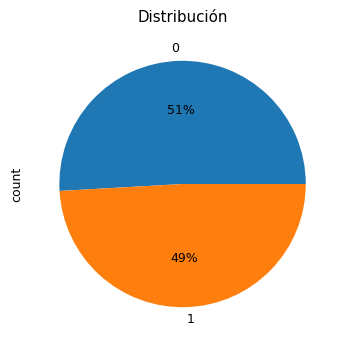

In [458]:
# Graficamos la distribución de la variable de entrada
# Vemos que el 51% NO son fumadores, mientras que el 49% si lo son.
data.SMOKING.value_counts().plot.pie(autopct='%1.0f%%',figsize=(4,4), title = 'Distribución')

Text(0.5, 1.0, 'Pacientes con diagnóstico Positivo COUGHING/No COUGHING')

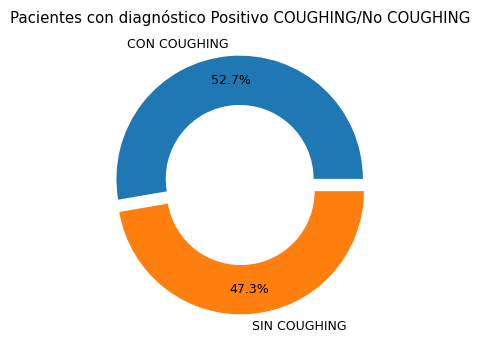

In [459]:
#¿Que Porcentaje de pacientes con COUGHING (Tos) poseen un diagnóstico POSITIVO de cáncer de Pulón?
pie_data = data[data['LUNG_CANCER']==1]['COUGHING'].value_counts()
labels = []
for i in pie_data.index:
    if i == 0:
        labels.append('SIN COUGHING')
    else:
        labels.append('CON COUGHING')
explode = [0.05,0.05]
plt.pie(pie_data,labels = labels,autopct='%1.1f%%',pctdistance = 0.8,wedgeprops={'width': 0.4},explode = explode)
plt.title('Pacientes con diagnóstico Positivo COUGHING/No COUGHING')

Podemos observar que entre aquellos pacientes con diagnóstico positivo de cáncer de pulmón, el 52.7% de los pacientes presentan tos, mientras que el 47.3% no poseen.

Text(0.5, 1.0, 'Pacientes con diagnóstico Positivo YELLOW_FINGERS/No YELLOW_FINGERS')

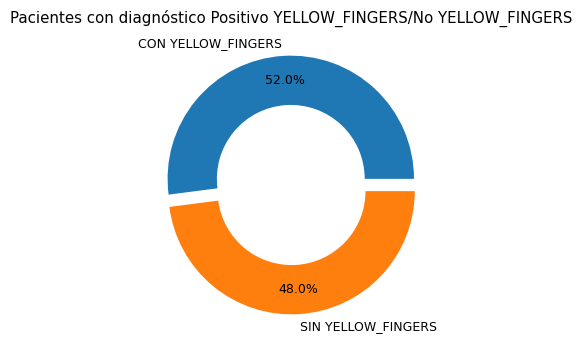

In [460]:
#¿Que Porcentaje de pacientes con DEDOS AMARILLOS poseen un diagnóstico POSITIVO de cáncer de Pulón?
pie_data = data[data['LUNG_CANCER']==1]['YELLOW_FINGERS'].value_counts()
labels = []
for i in pie_data.index:
    if i == 0:
        labels.append('SIN YELLOW_FINGERS')
    else:
        labels.append('CON YELLOW_FINGERS')
explode = [0.05,0.05]
plt.pie(pie_data,labels = labels,autopct='%1.1f%%',pctdistance = 0.8,wedgeprops={'width': 0.4},explode = explode)
plt.title('Pacientes con diagnóstico Positivo YELLOW_FINGERS/No YELLOW_FINGERS')

Podemos observar que entre aquellos pacientes con diagnóstico positivo de cáncer de pulmón, el 52.0% de los pacientes presentan dedos amarillos, mientras que el 48.0% no lo poseen.

Text(0.5, 1.0, 'Pacientes con diagnóstico Positivo Fumadores/No Fumadores')

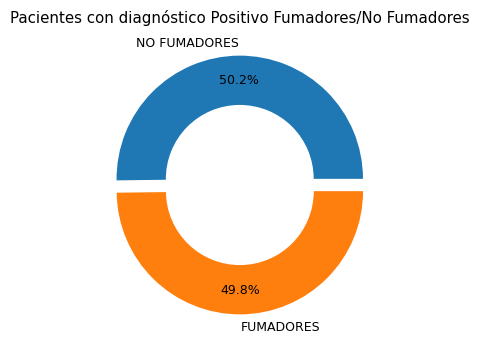

In [461]:
#¿Que Porcentaje de pacientes FUMADORES poseen un diagnóstico POSITIVO de cáncer de Pulón?
pie_data = data[data['LUNG_CANCER']==1]['SMOKING'].value_counts()
labels = []
for i in pie_data.index:
    if i == 0:
        labels.append('NO FUMADORES')
    else:
        labels.append('FUMADORES')
explode = [0.05,0.05]
plt.pie(pie_data,labels = labels,autopct='%1.1f%%',pctdistance = 0.8,wedgeprops={'width': 0.4},explode = explode)
plt.title('Pacientes con diagnóstico Positivo Fumadores/No Fumadores')

Podemos observar que entre aquellos pacientes con diagnóstico positivo de cáncer de pulmón, el 50.2% de los pacientes son NO fumadores, mientras que el 49.8% SI lo son.

In [462]:
# Menores de 50 años fumadores con cancer de pulmon positivo.
filtered_data = data[(data['AGE'] < 55) & (data['SMOKING'] == 1) & (data['LUNG_CANCER'] == 1)]
px.histogram(filtered_data, x='AGE', color='LUNG_CANCER', barmode='group')
fig = px.histogram(filtered_data, x='AGE', color='LUNG_CANCER', barmode='group')
fig.update_traces(text=filtered_data.groupby(['AGE', 'LUNG_CANCER']).size().values, textposition='auto')
fig.show()

In [463]:
# Mayores de 50 años fumadores con cancer de pulmon positivo.
filtered_data = data[(data['AGE'] > 55) & (data['SMOKING'] == 1) & (data['LUNG_CANCER'] == 1)]
px.histogram(filtered_data, x='AGE', color='LUNG_CANCER', barmode='group')
fig = px.histogram(filtered_data, x='AGE', color='LUNG_CANCER', barmode='group')
fig.update_traces(text=filtered_data.groupby(['AGE', 'LUNG_CANCER']).size().values, textposition='auto')
fig.show()

In [464]:
edad_30_47 = data[(data['AGE'] >= 30) & (data['AGE'] < 47)] & (data['SMOKING'] == 1) & (data['LUNG_CANCER'] == 1)
edad_47_64 = data[(data['AGE'] >= 47) & (data['AGE'] < 64)] & (data['SMOKING'] == 1) & (data['LUNG_CANCER'] == 1)
edad_64_81 = data[(data['AGE'] >= 64) & (data['AGE'] < 82)] & (data['SMOKING'] == 1) & (data['LUNG_CANCER'] == 1)
totals_data = {'Grupo de Edad': ['Entre 30 y 45 Años', 'Entre 45 y 60 años', 'Mas de 60 años'],
               'Cantidad Total de Casos': [len(edad_30_47), len(edad_47_64), len(edad_64_81)]}

totals_df = pd.DataFrame(data=totals_data)

fig = px.histogram(totals_df, x='Grupo de Edad', y='Cantidad Total de Casos', color='Grupo de Edad', 
             labels={'Cantidad Total de Casos': 'Cantidad Total de Casos'})

fig.show()

Lo que hicimos anteriormente fue comparar nuestras variables de entrada ("AGE" y "SMOKING") contra nuestra variable de salida "LUNG_CANCER", para hacer esto sacamos el numero de LA CANTIDAD de casos con diagnostico de cancer positivo que son fumadores habituales y los agrupamos en edades, podemos observar que nuestro dataset esta muy balanceado.

<h3>c. Transformación de Variables de entrada para utilizar en el modelo.</h3>

Nuestro dataset se compone principalmente de valores binarios, es decir, si el paciente presenta o no dicho diagnostico, ademas contamos con una variable Género y Edad.
Como vimos anteriormente lo que hicimos en nuestro dataset fue convertir todas las variables que ya nos venian por defecto (2: SI, 1: NO), en valores binarios (1 y 0), por lo que nos quedaria 1: SI, 0: NO, esta conversión la hicimos anteriormente en el apartado a).
Para nuestra variable "Age" lo que haremos para poder utilizarla como variable de entrada al modelo, será escalarla utilizando un "StandardScaler()".
Para nuestra variable "Gender" lo que haremos para poder utilizarla como variable de entrada al modelo, será aplicarle un "OneHotEncoder()".

In [465]:
#Nuestro dataset esta quedando de esta forma, sin el StandarScaler y OneHotEncoder, que lo aplicaremos en el mapper cuando entrenemos.
data.sample(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
2460,1,35,1,0,0,0,0,1,0,0,1,0,1,1,1,1
2594,0,33,1,1,0,1,1,1,0,0,1,1,1,1,1,1
1759,1,61,1,0,0,1,0,1,0,0,1,0,0,1,0,1
1163,1,53,1,1,1,0,1,0,1,1,0,1,1,0,1,0
2868,1,63,1,1,1,0,1,1,1,0,0,1,0,1,1,0
551,0,36,0,1,0,1,0,0,1,0,0,1,1,1,0,0
290,1,63,1,0,1,1,1,1,1,0,0,0,0,0,0,1
2802,1,79,1,1,1,1,0,0,0,1,1,0,0,1,1,1
2976,0,52,0,0,0,1,0,0,0,1,0,1,0,0,0,1
559,0,76,0,0,0,0,1,1,0,1,1,1,1,0,0,1


<h3>d. Análisis de variables Nulos/Extremos/Duplicados.</h3>

In [466]:
# Por lo que podemos observar el Dataset no tiene valores nulos.
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [467]:
#Vamos a comprobar si hay duplicados.
duplicates = data[data.duplicated(keep= False)]
print(duplicates)

      GENDER  AGE  SMOKING  ...  SWALLOWING_DIFFICULTY  CHEST_PAIN  LUNG_CANCER
962        1   53        0  ...                      0           1            0
1051       1   50        0  ...                      0           1            1
1476       1   53        0  ...                      0           1            0
2039       1   50        0  ...                      0           1            1

[4 rows x 16 columns]


Podemos ver que hay únicamente 2 registros duplicados, los podemos descartar ya que estos registros no afectan demasiado a nuestro análisis. Sin embargo, es interesante observar que existe la posibilidad de tener aleatoriamente los mismos valores que otro paciente, ya que todas ellas son respuestas booleanas (aparte de la edad).

In [468]:
#Descartamos los duplicados.
print('Tamaño del Dataset antes del descarte: ', len(data))
data.drop_duplicates(inplace= True)
print('Tamaño del Dataset luego del descarte: ', len(data))

Tamaño del Dataset antes del descarte:  3000
Tamaño del Dataset luego del descarte:  2998


<h3>e. Verificación de Variables Altamente correlacionadas linealmente.</h3>

In [469]:
#Escalamos las variables para poder observar mejor la correlación entre ellas.
int_data = data.select_dtypes(include='int64')
int_data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,0.011134,-0.027873,0.014440,-0.023914,0.009363,0.008507,0.002181,0.013890,-0.009294,-0.009191,-0.006185,0.011559,-0.015841,-0.001972,-0.016117
AGE,0.011134,1.000000,-0.020459,0.016034,0.029996,0.004018,-0.025735,-0.002251,0.024755,-0.018150,-0.020640,-0.024754,-0.015709,-0.001851,-0.005262,-0.035659
SMOKING,-0.027873,-0.020459,1.000000,-0.001516,-0.055591,-0.031405,0.045715,0.019662,0.004247,0.000575,0.003036,0.012371,-0.015111,-0.002349,-0.030750,0.014221
YELLOW_FINGERS,0.014440,0.016034,-0.001516,1.000000,0.011683,0.011420,-0.013892,-0.010100,-0.005732,0.004821,0.027853,0.010100,-0.034022,0.018584,-0.006580,0.013679
ANXIETY,-0.023914,0.029996,-0.055591,0.011683,1.000000,-0.024717,0.016247,-0.005587,-0.001166,-0.015409,-0.000876,-0.017101,-0.034999,0.033792,0.015972,-0.013867
PEER_PRESSURE,0.009363,0.004018,-0.031405,0.011420,-0.024717,1.000000,-0.021300,-0.017404,0.012047,-0.011355,0.013965,-0.013290,-0.029428,0.016628,-0.040036,-0.024653
CHRONIC_DISEASE,0.008507,-0.025735,0.045715,-0.013892,0.016247,-0.021300,1.000000,0.011746,-0.019623,0.022790,-0.027692,-0.003737,-0.020213,0.016404,-0.013947,-0.009574
FATIGUE,0.002181,-0.002251,0.019662,-0.010100,-0.005587,-0.017404,0.011746,1.000000,0.004961,0.014569,-0.000359,-0.001574,0.029525,0.010264,0.024620,0.001583
ALLERGY,0.013890,0.024755,0.004247,-0.005732,-0.001166,0.012047,-0.019623,0.004961,1.000000,0.005412,-0.011768,-0.045000,-0.041699,0.012292,0.019395,0.006504
WHEEZING,-0.009294,-0.018150,0.000575,0.004821,-0.015409,-0.011355,0.022790,0.014569,0.005412,1.000000,-0.004763,0.016125,-0.012144,-0.023461,-0.016029,-0.039299


<Axes: >

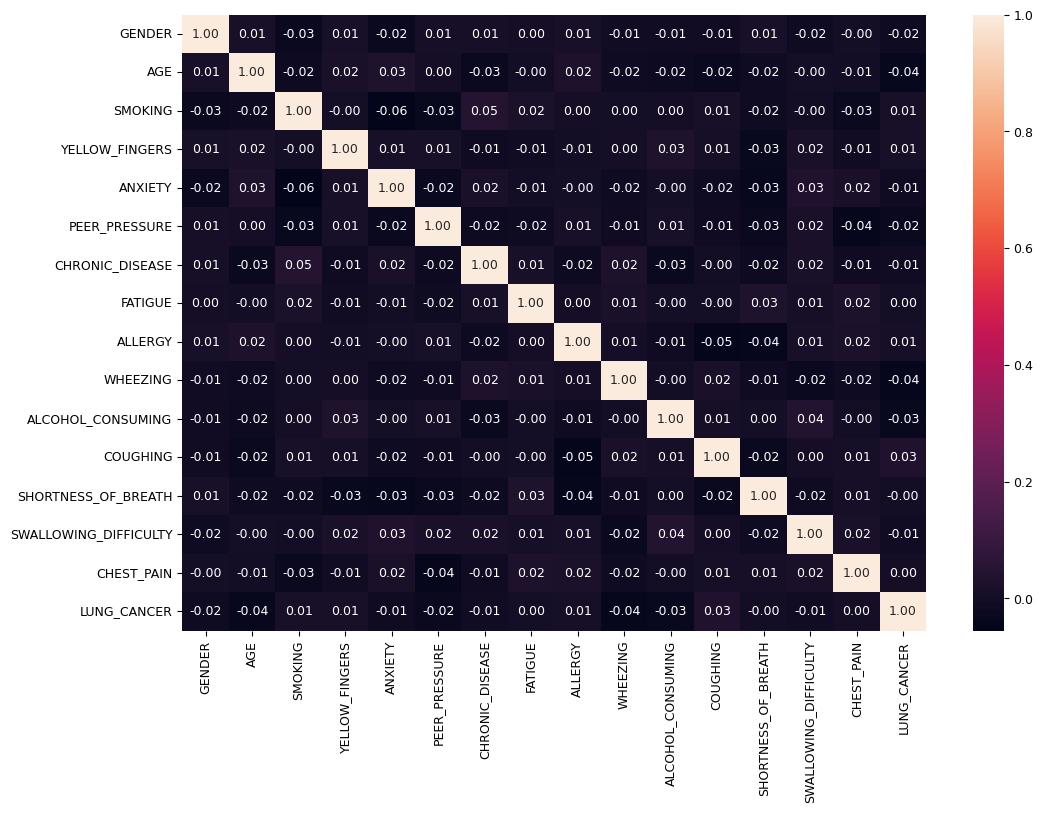

In [470]:
#Ploteamos el mapa de correlación entre variables.
plt.figure(figsize= (12, 8))
sns.heatmap(data.corr(),  annot= True, fmt= '.2f')

Con los datos presentes en nuestro dataset podemos observar una muy mala correlacion con los datos, entre otras cosas podemos ver que fumar presenta una correlacion positiva de solo el 1% con el diagnostico positivo de cáncer de pulmon...y así con la mayoria de nuestras variables, no podemos notar alguna correlación bien marcada, lo que nos hace sospechar de la fuente de los datos, que parece estar muy balanceado.

<h3>f. Listado de posibles Dudas/Preguntas al encargado de proveer los datos.</h3>

1. ¿Cuál es la fuente de los datos utilizados en el dataset previsto?
2. ¿Qué tipo de información contiene el dataset?
3. ¿Cómo se recopilaron los datos del dataset?
4. ¿Qué características o variables están presentes en el dataset?
5. ¿Hay documentación disponible que explique la estructura y el significado de cada campo en el dataset?
6. ¿Se han realizado procesos de limpieza o preprocesamiento de los datos anteriormente en el dataset?
7. ¿Cuál es el tamaño del dataset (número de filas y columnas)?
8. ¿Hay alguna información sensible o confidencial en el dataset que debamos tener en cuenta?
9. ¿Qué tipo de análisis o modelos se han aplicado previamente a los datos del dataset?
10. ¿Cuál es el objetivo principal de utilizar el dataset de detección de cáncer de pulmón en este contexto específico?


<h2>3. Hipótesis sobre los datos.</h2>

<h3>a. Hipótesis sobre el Valor de la Variable "Target"</h3>

A partir del análisis exploratorio de datos, se pueden formular varias hipótesis para entender la relación entre la variable de diagnóstico de cáncer de pulmón (LUNG_CANCER) y las demás variables del conjunto de datos. A continuación, se presentan estas hipótesis detalladamente:

* **Influencia del Hábito de Fumar:** La hipótesis principal es que el hábito de fumar ejerce una influencia significativa en el diagnóstico de cáncer de pulmón. Aunque el análisis de correlación no muestra una relación extremadamente alta entre el hábito de fumar y el diagnóstico de cáncer, el hábito de fumar sigue siendo un factor de riesgo conocido y considerable. Los datos indican que el 49.8% de los pacientes diagnosticados con cáncer de pulmón son fumadores. Este porcentaje es comparable al de los no fumadores, sugiriendo que, aunque fumar es un factor relevante, no actúa como el único determinante del diagnóstico. Es posible que la influencia del hábito de fumar esté moderada por otros factores, como la edad o la presencia de síntomas.

* **Síntomas Asociados con el Cáncer:** Otra hipótesis es que la presencia de síntomas específicos, como tos (COUGHING) y dedos amarillos (YELLOW_FINGERS), está asociada con un mayor riesgo de cáncer de pulmón. Los datos muestran que aproximadamente el 52.7% de los pacientes con cáncer de pulmón reportan tos, y el 52.0% presentan dedos amarillos. Estos porcentajes son ligeramente superiores a los observados en la población general. Aunque estos síntomas podrían indicar la presencia de cáncer de pulmón, no son definitivos por sí mismos. La asociación entre estos síntomas y el diagnóstico sugiere que podrían ser indicadores importantes, pero deben ser considerados en conjunto con otras variables para una evaluación más precisa.

* **Edad como Factor de Riesgo:** La edad también podría ser un factor relevante en el diagnóstico de cáncer de pulmón. El análisis revela que los pacientes con cáncer de pulmón tienden a concentrarse en dos rangos etarios específicos: entre 32 y 46 años, y entre 70 y 81 años. Este hallazgo sugiere que tanto la juventud temprana como la edad avanzada están asociadas con una mayor incidencia de cáncer de pulmón. La influencia de la edad puede estar relacionada con la acumulación de factores de riesgo a lo largo del tiempo, así como con la predisposición genética o ambiental. La inclusión de la edad como una variable en el modelo podría mejorar la precisión del diagnóstico al capturar estas variaciones etarias.


<h3>b. Hallazgos Adicionales y su Impacto en la Creación de un Modelo</h3>

El análisis exploratorio de los datos del conjunto de pacientes diagnosticados con cáncer de pulmón ha revelado varios hallazgos adicionales que podrían influir significativamente en la construcción y precisión del modelo predictivo. Estos hallazgos son clave para mejorar la capacidad del modelo de identificar correctamente los casos de cáncer de pulmón y para determinar la importancia relativa de cada factor de riesgo. A continuación, se describen algunos de los principales hallazgos:

* **Balance de Clases en la Variable Objetivo:** El conjunto de datos está razonablemente balanceado en cuanto a la distribución de la variable objetivo (LUNG_CANCER). Aproximadamente la mitad de los pacientes del dataset han sido diagnosticados con cáncer de pulmón, mientras que la otra mitad no presenta este diagnóstico. Este equilibrio en las clases es un hallazgo positivo, ya que la ausencia de desbalance significativo evita el sesgo en los modelos supervisados. En un dataset altamente desbalanceado, un modelo podría sesgarse hacia la predicción de la clase mayoritaria, lo que llevaría a un bajo rendimiento en la identificación de casos menos comunes. Este balance asegura que el modelo pueda identificar tanto los pacientes con diagnóstico positivo como los negativos sin perder precisión.

* **Relación No Lineal entre Variables:** Aunque algunas variables, como el hábito de fumar y la presencia de síntomas, muestran una correlación con el diagnóstico de cáncer de pulmón, los análisis sugieren que estas relaciones no son lineales ni directas. Esto implica que factores adicionales podrían estar interactuando entre sí para influir en el diagnóstico. Por ejemplo, variables como la edad, el historial familiar y factores ambientales, aunque no tengan una correlación aislada alta, podrían tener un efecto combinado que sea más significativo. La incorporación de modelos que capturen interacciones no lineales, como árboles de decisión o redes neuronales, podría mejorar la capacidad de predicción.

* **Rangos Etarios en la Distribución del Diagnóstico:** Un hallazgo relevante es la distribución del cáncer de pulmón en rangos de edad específicos, particularmente en pacientes jóvenes y de edad avanzada. Los pacientes diagnosticados se encuentran concentrados en dos grupos etarios: de 32 a 46 años y de 70 a 81 años. Este hallazgo sugiere que los modelos predictivos deben tener en cuenta la edad como un factor clave, posiblemente utilizando una función no lineal o categorizando la edad en intervalos, para reflejar mejor los patrones observados en los datos.


El impacto de estos hallazgos en la creación del modelo es significativo. En primer lugar, el balance en la variable objetivo permite utilizar modelos tradicionales de clasificación sin tener que aplicar técnicas para corregir el desbalance de clases. Sin embargo, debido a la naturaleza no lineal de las relaciones entre las variables, puede ser necesario considerar modelos avanzados como redes neuronales, máquinas de soporte vectorial o ensamblados de modelos (como Random Forest o Gradient Boosting) que capturen mejor las interacciones complejas.

Además, la presencia de multicolinealidad y de relaciones no evidentes entre variables como el tabaquismo y otros síntomas implica que es esencial un proceso de ingeniería de características (feature engineering) cuidadoso. Esto incluye la posible transformación de variables y la inclusión de interacciones entre variables para capturar mejor las relaciones subyacentes.

Finalmente, el uso de técnicas de validación cruzada y la inclusión de métricas de rendimiento robustas (como precisión, recall y F1-score) serán esenciales para evaluar adecuadamente el rendimiento del modelo y garantizar que no se sobreajuste a los patrones específicos del conjunto de datos actual.

<h3>c. Análisis sobre la Creación de Nuevas Variables</h3>

En el análisis de datos para el diagnóstico de cáncer de pulmón, la creación de variables derivadas a partir de los datos existentes puede aportar información adicional valiosa para mejorar la capacidad predictiva del modelo. A continuación, se exploran las variables derivadas y su impacto potencial en el modelo:



**Creación y Análisis de la Variable RISK_INDEX** La variable se define como un indicador de riesgo respiratorio basado en la presencia de tos (COUGHING), dificultad para respirar (SHORTNESS_OF_BREATH) y silbido al respirar (WHEEZING). Si alguno de estos síntomas está presente, el RISK_INDEX se asigna a 1; de lo contrario, a 0.


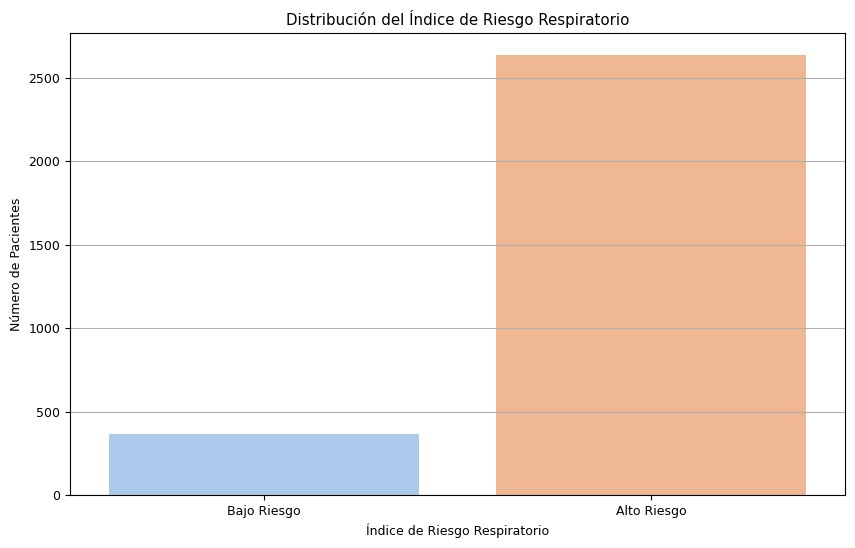

In [471]:
dataset['RISK_INDEX'] = np.where(
    (dataset['COUGHING'] == 1) | 
    (dataset['SHORTNESS_OF_BREATH'] == 1) | 
    (dataset['WHEEZING'] == 1), 
    
    1, 
    0
)

# Gráfico de distribución del índice de riesgo respiratorio
plt.figure(figsize=(10, 6))
sns.countplot(x='RISK_INDEX', data=dataset, palette='pastel')
plt.title('Distribución del Índice de Riesgo Respiratorio')
plt.xlabel('Índice de Riesgo Respiratorio')
plt.ylabel('Número de Pacientes')
plt.xticks([0, 1], ['Bajo Riesgo', 'Alto Riesgo'])
plt.grid(axis='y')
plt.show()

El gráfico resultante indica que 2,636 pacientes (88.5%) presentan un alto riesgo respiratorio, mientras que 364 pacientes (11.5%) tienen un riesgo bajo. Este desbalance significativo en la distribución de pacientes puede afectar el rendimiento del modelo, lo que debe tenerse en cuenta al seleccionar las técnicas de entrenamiento más adecuadas.

<h2> 4. Modelado </h2>

<h3>a. Métrica de performance a utilizar para evaluar los modelos .</h3>

### AUC-ROC (Área bajo la curva de operaciones del receptor)

La métrica principal que se utilizará para evaluar los modelos es el AUC-ROC. La AUC-ROC mide la capacidad del modelo para distinguir entre las clases positivas (pacientes con cáncer de pulmón) y negativas (pacientes sin cáncer). Se calcula como el área bajo la curva que relaciona la tasa de verdaderos positivos (sensibilidad) con la tasa de falsos positivos (1 - especificidad) a diferentes umbrales de clasificación.

**Ventajas de la AUC-ROC**

* **Independiente del umbral de clasificación:** No se ve afectada por la elección de un umbral específico, lo que permite evaluar el modelo en múltiples escenarios posibles.
* **Mide la capacidad de discriminación:** Evalúa cómo de bien el modelo es capaz de separar las clases positivas y negativas.
* **Independencia de la distribución de clases:** Es particularmente útil cuando las clases están desbalanceadas, lo que podría ser un factor en un dataset médico.
* **Interpretable:** El valor del AUC-ROC es fácil de interpretar, donde un valor cercano a 1 indica una excelente capacidad de discriminación y un valor cercano a 0.5 sugiere que el modelo no es mejor que una clasificación aleatoria.

**Otras Métricas Relevantes**

* **Precisión:** Mide la proporción de verdaderos positivos entre todos los positivos predichos. Es importante, pero puede ser engañosa en conjuntos de datos desbalanceados.
* **Sensibilidad (Recall):** Mide la proporción de verdaderos positivos entre todos los positivos reales. En contextos clínicos, como en el diagnóstico de cáncer, esta métrica es crucial para asegurarse de que el modelo identifica correctamente la mayor cantidad de casos positivos, aunque eso signifique aceptar algunos falsos positivos.
* **Especificidad:** Mide la proporción de verdaderos negativos entre todos los negativos reales. En situaciones donde se desea minimizar los falsos positivos, la especificidad es relevante.
* **F1-Score:** Combina la precisión y la sensibilidad, proporcionando una medida equilibrada entre ambas, especialmente útil cuando el objetivo es equilibrar ambos tipos de errores (falsos positivos y falsos negativos).

**Conclusión**

La AUC-ROC es la métrica más general y útil para evaluar la capacidad del modelo para discriminar entre clases positivas y negativas en este problema de clasificación binaria. Al ser independiente del umbral de clasificación y robusta ante desbalances en las clases, permite tener una evaluación amplia de la performance del modelo. No obstante, dado el contexto médico, se complementará con otras métricas como la sensibilidad, que es fundamental para identificar correctamente la mayor cantidad de casos positivos (pacientes con cáncer). Esto garantiza un análisis más completo y ajustado a las necesidades del problema.

<h3>b. Aplicación de Feature Engineering.</h3>

En la búsqueda de mejorar el rendimiento predictivo de un modelo de clasificación para predecir el cáncer de pulmón, se exploraron dos técnicas de Feature Engineering. Estas estrategias estaban orientadas a identificar si las nuevas características generadas podrían proporcionar una ventaja en la capacidad del modelo para diferenciar entre casos positivos y negativos de la enfermedad. Los enfoques evaluados fueron:

1. **Creación de una variable combinada para síntomas comunes.**
2. **Categorizar los datos de edad en grupos específicos.**

Cada técnica se comparó con un modelo base sin ingeniería de características para evaluar su impacto en la métrica AUC-ROC.

In [472]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

label_encoder = LabelEncoder()
dataset['GENDER'] = label_encoder.fit_transform(dataset['GENDER'])

**Estrategia 1: Combinación de Síntomas Comunes**

En este primer enfoque, creamos una variable combinada (SYMPTOM_COMBINED) que indica si el paciente presenta al menos uno de los síntomas comunes, como tos, dificultad para respirar o sibilancias. Esto permite que los modelos identifiquen más fácilmente patrones relacionados con síntomas críticos.

In [473]:
dataset['SYMPTOM_COMBINED'] = np.where(
    (dataset['COUGHING'] == 1) | 
    (dataset['SHORTNESS_OF_BREATH'] == 1) | 
    (dataset['WHEEZING'] == 1), 
    1, 0
)

# Definir las variables X (características) e y (objetivo)
X = dataset.drop(columns=['LUNG_CANCER'])
y = dataset['LUNG_CANCER']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las características categóricas
categorical_features = ['SYMPTOM_COMBINED']

# Preprocesador con OneHotEncoder para la característica categórica SYMPTOM_COMBINED
preprocessor_fe = ColumnTransformer(
    transformers=[
        ('symptom_combined', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Crear pipelines para cada modelo con feature engineering
model_pipelines_fe = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor_fe),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression())
    ]),
    'KNN': Pipeline(steps=[
        ('preprocessor', preprocessor_fe),
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Decision Tree': Pipeline(steps=[
        ('preprocessor', preprocessor_fe),
        ('scaler', StandardScaler()),
        ('model', DecisionTreeClassifier(random_state=42))
    ])
}

# Crear pipelines para cada modelo sin feature engineering (sin la columna SYMPTOM_COMBINED)
model_pipelines_base = {
    'Logistic Regression': Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', LogisticRegression())
    ]),
    'KNN': Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Decision Tree': Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', DecisionTreeClassifier(random_state=42))
    ])
}

# Evaluar cada modelo con y sin feature engineering
for model_name in model_pipelines_base.keys():
    # Evaluación sin feature engineering
    X_train_base, X_test_base = X_train.drop(columns=['SYMPTOM_COMBINED']), X_test.drop(columns=['SYMPTOM_COMBINED'])
    pipeline_base = model_pipelines_base[model_name]
    pipeline_base.fit(X_train_base, y_train)
    y_pred_base = pipeline_base.predict_proba(X_test_base)[:, 1]
    auc_base = roc_auc_score(y_test, y_pred_base)
    print(f"AUC-ROC sin feature engineering ({model_name}): {auc_base}")

    # Evaluación con feature engineering
    pipeline_fe = model_pipelines_fe[model_name]
    pipeline_fe.fit(X_train, y_train)
    y_pred_fe = pipeline_fe.predict_proba(X_test)[:, 1]
    auc_fe = roc_auc_score(y_test, y_pred_fe)
    print(f"AUC-ROC con feature engineering ({model_name}): {auc_fe}")

ROC AUC sin feature engineering (Logistic Regression): 0.5247344326414507
ROC AUC con feature engineering (Logistic Regression): 0.5248788835059336
ROC AUC sin feature engineering (KNN): 0.5096170940930708
ROC AUC con feature engineering (KNN): 0.5096170940930708
ROC AUC sin feature engineering (Decision Tree): 0.5007166985199343
ROC AUC con feature engineering (Decision Tree): 0.497533223698831


**Resultados:**

*Logistic Regression:*
* Sin Feature Engineering: 0.5247
* Con Feature Engineering: 0.5249

*KNN:*
* Sin Feature Engineering: 0.5096
* Con Feature Engineering: 0.5096

*Decision Tree:*
* Sin Feature Engineering: 0.5007
* Con Feature Engineering: 0.4975

**Estrategia 2: Categorización de la Edad en Grupos Específicos**

En el segundo enfoque, categorizamos la edad de los pacientes en grupos específicos (Joven, Adulto, Anciano) y aplicamos OneHotEncoding a esta nueva variable AGE_GROUP para incorporarla al entrenamiento de los modelos. Este enfoque ayuda a evaluar si la segmentación por edad puede mejorar la capacidad predictiva del modelo.

In [474]:
# Categorización de la edad en grupos
dataset['AGE_GROUP'] = pd.cut(dataset['AGE'], bins=[0, 30, 50, np.inf], labels=['Joven', 'Adulto', 'Anciano'])

# Definir las variables X (características) e y (objetivo)
X = dataset.drop(columns=['LUNG_CANCER'])
y = dataset['LUNG_CANCER']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las características categóricas
categorical_features = ['AGE_GROUP']

preprocessor_fe = ColumnTransformer(
    transformers=[
        ('age_group', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# Crear pipelines para cada modelo con feature engineering
model_pipelines_fe = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor_fe),
        ('scaler', StandardScaler()),
        ('model', LogisticRegression())
    ]),
    'KNN': Pipeline(steps=[
        ('preprocessor', preprocessor_fe),
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Decision Tree': Pipeline(steps=[
        ('preprocessor', preprocessor_fe),
        ('scaler', StandardScaler()),
        ('model', DecisionTreeClassifier(random_state=42))
    ])
}

# Crear pipelines para cada modelo sin feature engineering (sin la columna AGE_GROUP)
model_pipelines_base = {
    'Logistic Regression': Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', LogisticRegression())
    ]),
    'KNN': Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Decision Tree': Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('model', DecisionTreeClassifier(random_state=42))
    ])
}

# Evaluar cada modelo con y sin feature engineering
for model_name in model_pipelines_base.keys():
    # Evaluación sin feature engineering
    X_train_base, X_test_base = X_train.drop(columns=['AGE_GROUP']), X_test.drop(columns=['AGE_GROUP'])
    pipeline_base = model_pipelines_base[model_name]
    pipeline_base.fit(X_train_base, y_train)
    y_pred_base = pipeline_base.predict_proba(X_test_base)[:, 1]
    auc_base = roc_auc_score(y_test, y_pred_base)
    print(f"AUC-ROC sin feature engineering ({model_name}): {auc_base}")

    # Evaluación con feature engineering
    pipeline_fe = model_pipelines_fe[model_name]
    pipeline_fe.fit(X_train, y_train)
    y_pred_fe = pipeline_fe.predict_proba(X_test)[:, 1]
    auc_fe = roc_auc_score(y_test, y_pred_fe)
    print(f"AUC-ROC con feature engineering ({model_name}): {auc_fe}")


ROC AUC sin feature engineering (Logistic Regression): 0.5249455531356948
ROC AUC con feature engineering (Logistic Regression): 0.5243788612827237
ROC AUC sin feature engineering (KNN): 0.5096170940930708
ROC AUC con feature engineering (KNN): 0.5120560913818392
ROC AUC sin feature engineering (Decision Tree): 0.4917440775145562
ROC AUC con feature engineering (Decision Tree): 0.49087181652517886


**Resultados:**

*Logistic Regression:*
* Sin Feature Engineering: 0.5249
* Con Feature Engineering: 0.5244

*KNN:*
* Sin Feature Engineering: 0.5096
* Con Feature Engineering: 0.5121

*Decision Tree:*
* Sin Feature Engineering: 0.4917
* Con Feature Engineering: 0.4909

**Conclusión**

En general, los modelos no mostraron una mejora significativa al aplicar estas técnicas de feature engineering, lo cual podría indicar que las características utilizadas (como síntomas comunes y la categorización de la edad) no están agregando información relevante o diferenciadora para la predicción del cáncer de pulmón en este dataset en particular.

<h3>c. Modelos evaluados </h3>

In [475]:
import warnings
from sklearn import metrics
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import GridSearchCV

<h4> Preparacion de los datos y creacion de pipelines </h4>

In [476]:
pd.options.display.max_columns = 0

plt.rcParams.update({
    "font.size": 9,
    'figure.figsize': (15.0, 4.0),
})

np.set_printoptions(suppress=True)

warnings.filterwarnings('ignore')

In [477]:
all_data = pd.read_csv('Lung_Cancer.csv')

In [478]:
def evaluate_model(model, set_names=('train', 'validation'), title='', show_cm=True, show_roc=True):
    if title:
        display(title)
        
    final_metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1': [],
        'AUC-ROC': []  # Añadimos la métrica AUC-ROC        
    }
        
    for i, set_name in enumerate(set_names):
        assert set_name in ['train', 'validation', 'test']
        set_data = globals()[set_name] 

        y = set_data.LUNG_CANCER
        y_pred = model.predict(set_data)
        y_prob = model.predict_proba(set_data)[:, 1]  # Predicciones de probabilidad para la clase positiva
        
        final_metrics['Accuracy'].append(metrics.accuracy_score(y, y_pred))
        final_metrics['Precision'].append(metrics.precision_score(y, y_pred, pos_label='YES'))
        final_metrics['Recall'].append(metrics.recall_score(y, y_pred, pos_label='YES'))
        final_metrics['F1'].append(metrics.f1_score(y, y_pred, pos_label='YES'))
        final_metrics['AUC-ROC'].append(metrics.roc_auc_score(y, y_prob))  # Cálculo del AUC-ROC
        
        if show_cm:
            cm = metrics.confusion_matrix(y, y_pred)
            cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                                     display_labels=['negative', 'positive'])
            cm_plot.plot(cmap="Blues")
            cm_plot.ax_.set_title(set_name)
        
        if show_roc:
            fpr, tpr, _ = metrics.roc_curve(y, y_prob, pos_label='YES')
            plt.figure()
            plt.plot(fpr, tpr, label=f'{set_name} ROC curve (AUC = {final_metrics["AUC-ROC"][-1]:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{set_name} ROC Curve')
            plt.legend(loc="lower right")
            plt.show()

    display(pd.DataFrame(final_metrics, index=set_names))

<h5>Conjunto de datos </h5>

In [479]:
# 60% train, 20% test, 20% validation
train, not_train = train_test_split(all_data, test_size=0.4, random_state=42)
validation, test = train_test_split(not_train, test_size=0.5, random_state=42)

train.shape, validation.shape, test.shape

((1800, 16), (600, 16), (600, 16))

<h4>Mapper</h4>

In [480]:
# Definimos el mapper. Recibe una lista de (columna/s, transformers)
mapper = DataFrameMapper([
    (['AGE'], [StandardScaler()]),
    (['GENDER'], [OneHotEncoder()]),
    (['SMOKING'], [OneHotEncoder()]),
    (['YELLOW_FINGERS'], [OneHotEncoder()]),
    (['ANXIETY'], [OneHotEncoder()]),
    (['PEER_PRESSURE'], [OneHotEncoder()]),
    (['CHRONIC_DISEASE'], [OneHotEncoder()]),
    (['FATIGUE'], [OneHotEncoder()]),
    (['ALLERGY'], [OneHotEncoder()]),
    (['WHEEZING'], [OneHotEncoder()]),
    (['ALCOHOL_CONSUMING'], [OneHotEncoder()]),
    (['COUGHING'], [OneHotEncoder()]),
    (['SHORTNESS_OF_BREATH'], [OneHotEncoder()]),
    (['SWALLOWING_DIFFICULTY'], [OneHotEncoder()]),
    (['CHEST_PAIN'], [OneHotEncoder()]),
])

# Lo entrenamos con train
mapper.fit(train)

DataFrameMapper(drop_cols=[],
                features=[(['AGE'], [StandardScaler()]),
                          (['GENDER'], [OneHotEncoder()]),
                          (['SMOKING'], [OneHotEncoder()]),
                          (['YELLOW_FINGERS'], [OneHotEncoder()]),
                          (['ANXIETY'], [OneHotEncoder()]),
                          (['PEER_PRESSURE'], [OneHotEncoder()]),
                          (['CHRONIC_DISEASE'], [OneHotEncoder()]),
                          (['FATIGUE'], [OneHotEncoder()]),
                          (['ALLERGY'], [OneHotEncoder()]),
                          (['WHEEZING'], [OneHotEncoder()]),
                          (['ALCOHOL_CONSUMING'], [OneHotEncoder()]),
                          (['COUGHING'], [OneHotEncoder()]),
                          (['SHORTNESS_OF_BREATH'], [OneHotEncoder()]),
                          (['SWALLOWING_DIFFICULTY'], [OneHotEncoder()]),
                          (['CHEST_PAIN'], [OneHotEncoder()])])

In [481]:
sample = train.sample(5, random_state=42)

In [482]:
mapper.transform(sample)

array([[-1.11253391,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.        ,  0.        ],
       [ 0.5269498 ,  0.        ,  1.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [-0.08785659,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
  

<h4>Regresión logística</h4>

In [483]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

'Logistic Regression'

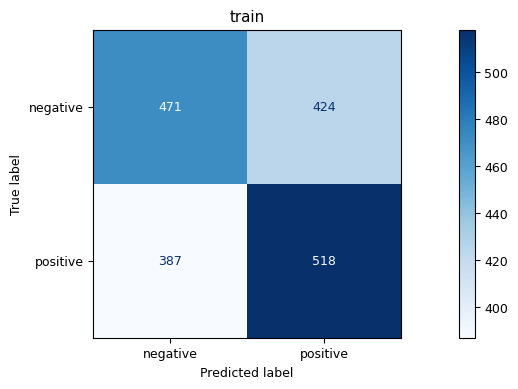

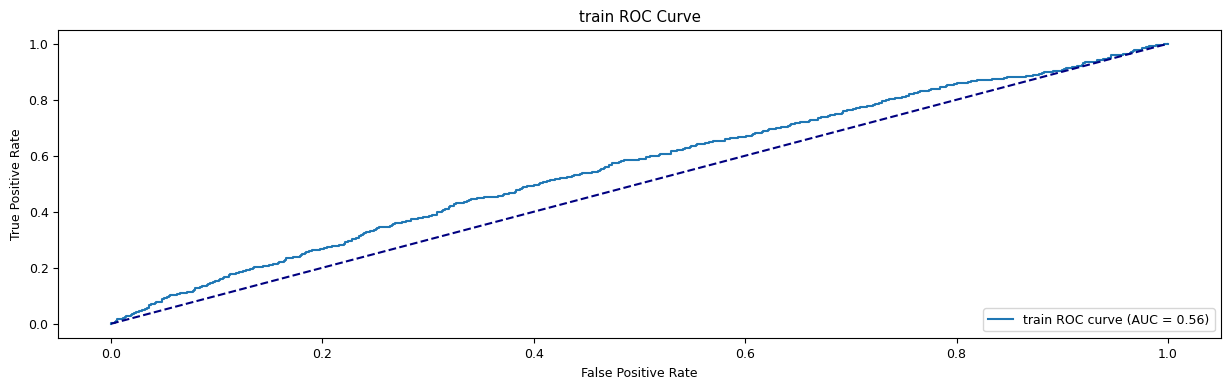

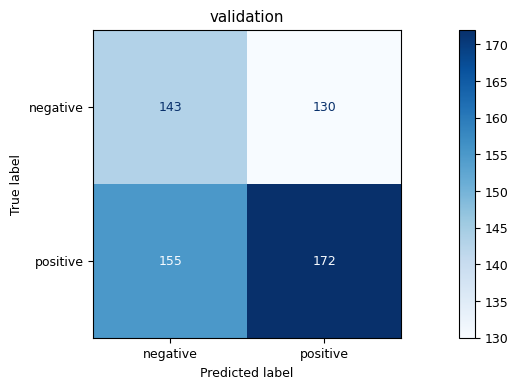

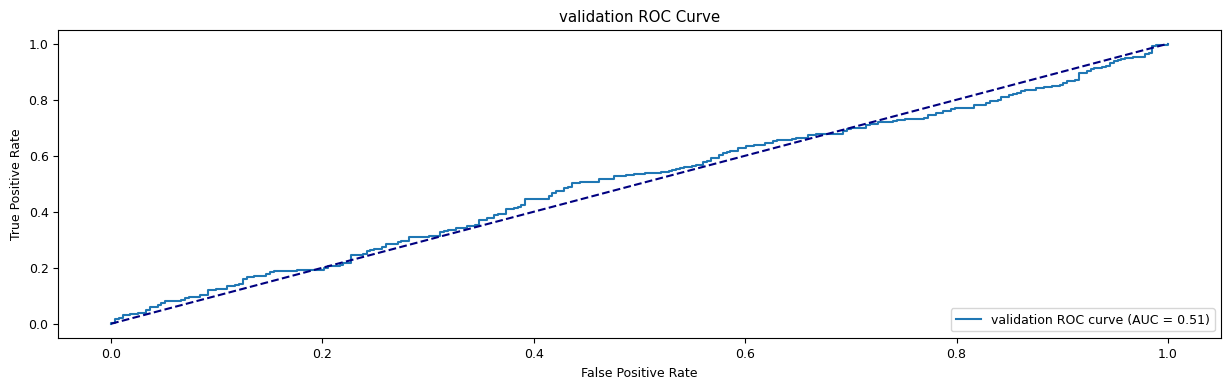

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.549444,0.549894,0.572376,0.56091,0.560152
validation,0.525000,0.569536,0.525994,0.54690,0.506839


In [484]:
lr_model_si = Pipeline([
    ('mapper', mapper),
    ('classifier', LogisticRegression(random_state=42)),
])

lr_model_si.fit(train, train.LUNG_CANCER)

evaluate_model(lr_model_si, set_names=('train', 'validation'), title='Logistic Regression')

**Conclusión**

* **Train:** El AUC-ROC de 0.56 indica un rendimiento moderado en la capacidad del modelo para discriminar entre clases en el conjunto de entrenamiento. Aunque el modelo tiene un rendimiento decente, el AUC-ROC sugiere que hay margen para mejorar en la capacidad de diferenciación entre las clases.

* **Validation:** El AUC-ROC de 0.51 en el conjunto de validación es significativamente menor, indicando que el modelo tiene dificultades para generalizar bien fuera del conjunto de entrenamiento. Esto refleja una pérdida de capacidad discriminativa en datos no vistos, sugiriendo que la regresión logística no está capturando adecuadamente la complejidad de los datos en el entorno de validación.

<h4> K-NN </h4>

In [485]:
from sklearn.neighbors import KNeighborsClassifier

'Knn'

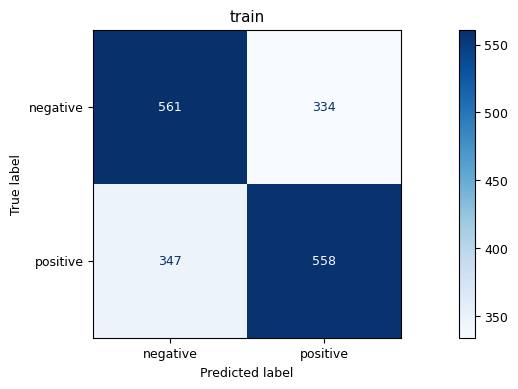

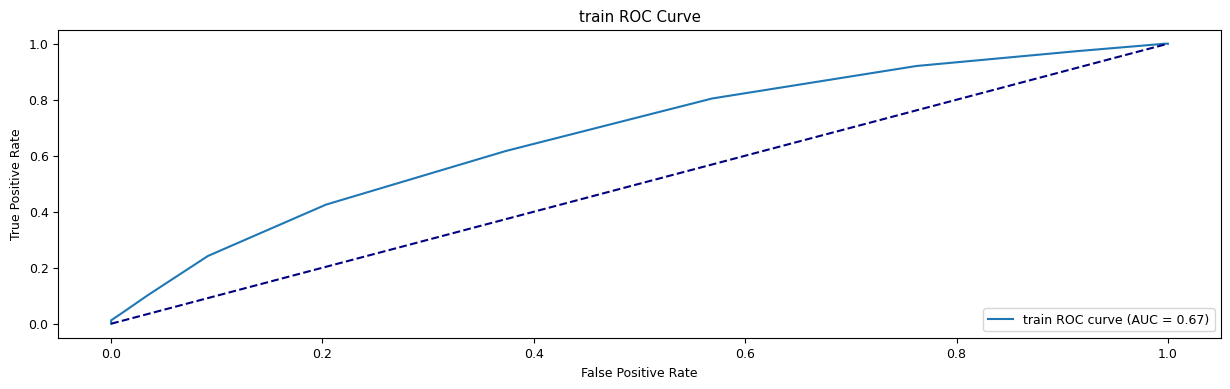

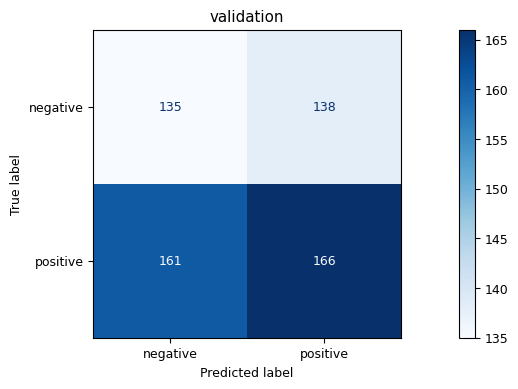

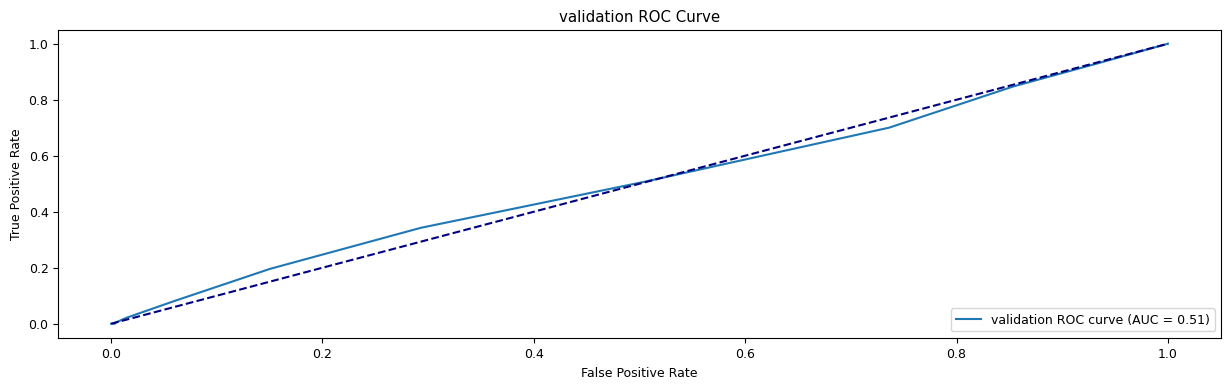

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.621667,0.625561,0.616575,0.621035,0.671973
validation,0.501667,0.546053,0.507645,0.526149,0.509045


In [486]:
K = 15

knn_model = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=K)),
])

knn_model.fit(train, train.LUNG_CANCER)

evaluate_model(knn_model, title='Knn', show_cm=True)

**Conclusión**

* **Train:** El AUC-ROC de 0.67 muestra una mejora notable en la capacidad de discriminación entre clases en el conjunto de entrenamiento en comparación con la regresión logística. Esto sugiere que el modelo K-NN es más eficaz en aprender patrones en los datos de entrenamiento.
* **Validation:** El AUC-ROC de 0.51 en el conjunto de validación es muy similar al obtenido con la regresión logística. Esto indica que, a pesar de un buen rendimiento en el entrenamiento, el modelo K-NN también enfrenta dificultades en la generalización, lo que puede ser indicativo de sobreajuste.

<h4> Decision Tree </h4>

'Decision Tree'

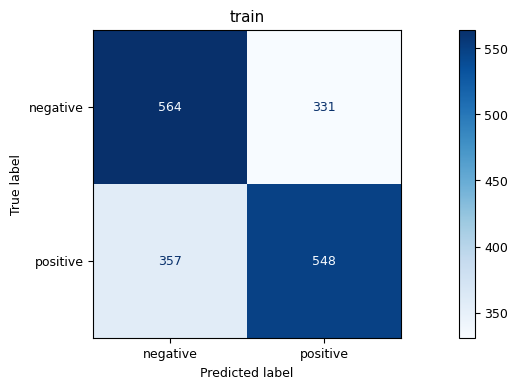

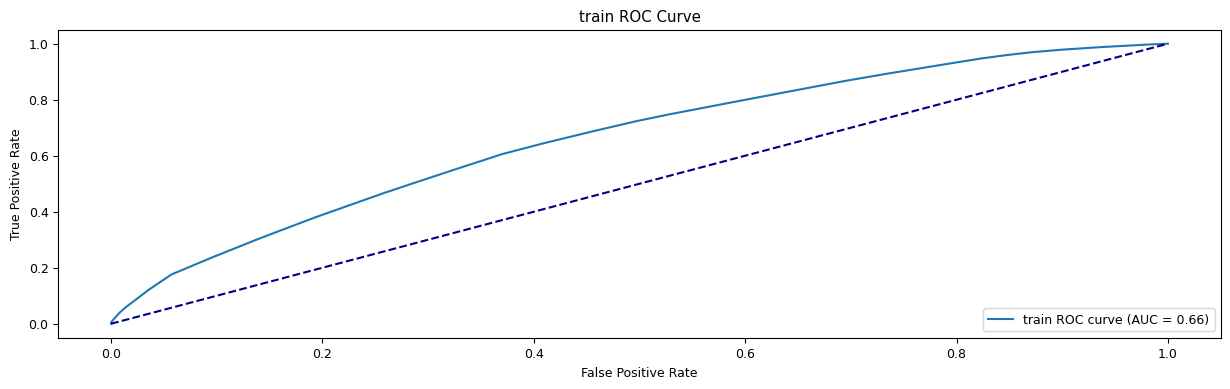

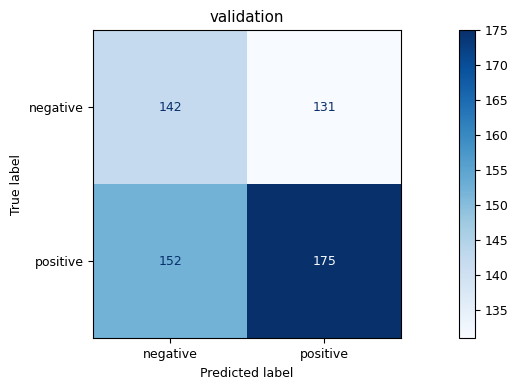

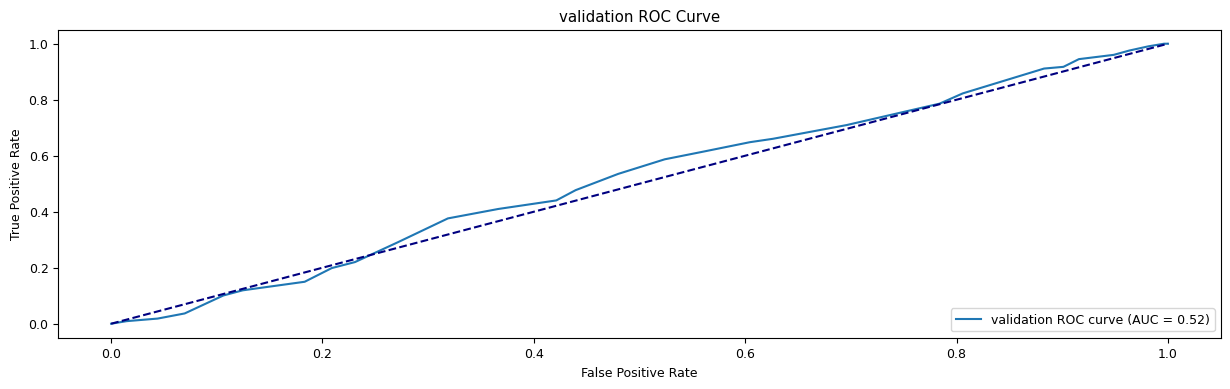

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.617778,0.623436,0.605525,0.614350,0.663072
validation,0.528333,0.571895,0.535168,0.552923,0.518522


In [487]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_model = Pipeline([
    ('mapper', mapper),
    ('classifier', tree_model),
])

dt_model.fit(train, train.LUNG_CANCER)

evaluate_model(dt_model, title='Decision Tree')

**Conclusión**

* **Train:** El AUC-ROC de 0.66 en el conjunto de entrenamiento es comparable al de K-NN y superior al de la regresión logística, indicando una capacidad razonable para diferenciar entre clases en los datos de entrenamiento.
* **Validation:** El AUC-ROC de 0.52 en el conjunto de validación muestra una ligera disminución en la capacidad discriminativa comparado con el entrenamiento. Aunque el árbol de decisión generaliza algo mejor que K-NN, la capacidad de discriminación aún es baja en el conjunto de validación, sugiriendo que el modelo podría beneficiarse de ajustes adicionales.

<h4> Grid Search </h4>

In [488]:
models = {
    'Linear Regression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
            'random_state': [42, 123, 456],
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [2, 5, 7, 10, 15],
            'random_state': [42, 123, 456],
        }
    }
}

# Realiza la búsqueda de hiperparámetros
for model_name, model in models.items():
    grid_search = GridSearchCV(model['model'], model['params'])

    gs_pipe = Pipeline([
        ('mapper', mapper),
        ('imputer', IterativeImputer(random_state=42)),
        ('classifier', grid_search),
    ])

    gs_pipe.fit(train, train.LUNG_CANCER)
    
    print(f"Mejores hiperparámetros para {model_name}: {grid_search.best_params_}")
    print(f"Puntuación del mejor modelo: {grid_search.best_score_}")
    print()

Mejores hiperparámetros para Linear Regression: {'random_state': 42, 'solver': 'liblinear'}
Puntuación del mejor modelo: 0.5233333333333332

Mejores hiperparámetros para KNN: {'algorithm': 'auto', 'n_neighbors': 9}
Puntuación del mejor modelo: 0.5427777777777777

Mejores hiperparámetros para Decision Tree: {'max_depth': 5, 'random_state': 456}
Puntuación del mejor modelo: 0.5233333333333334



Como podemos observar, hemos identificado los mejores hiperparámetros para cada modelo. Ahora procederemos a volver a ejecutar los modelos utilizando estos parámetros óptimos. A continuación, visualizaremos las métricas de rendimiento para evaluar si hay mejoras significativas en comparación con los resultados obtenidos previamente.



<h4> Regresión Logistica </h4> 


'Logistic Regression'

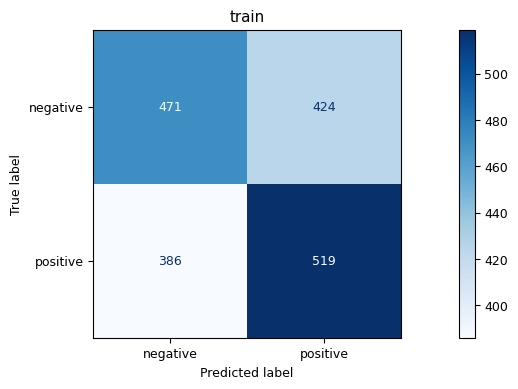

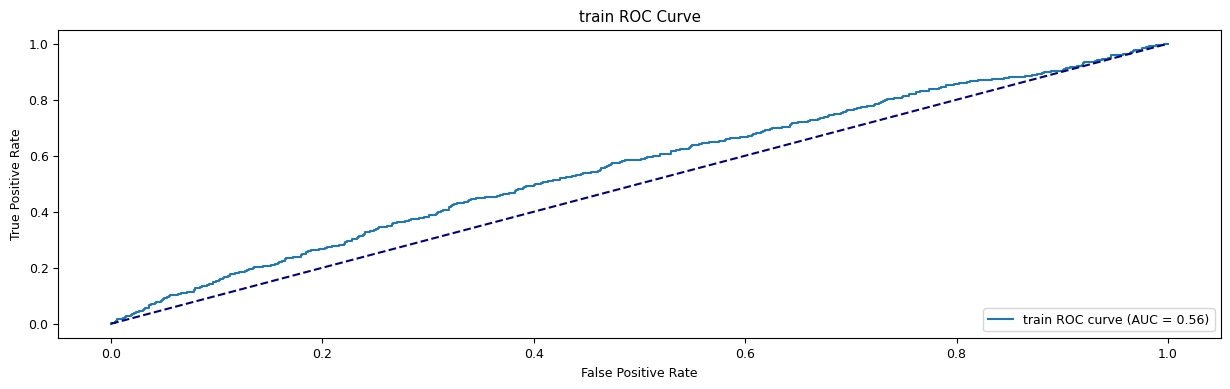

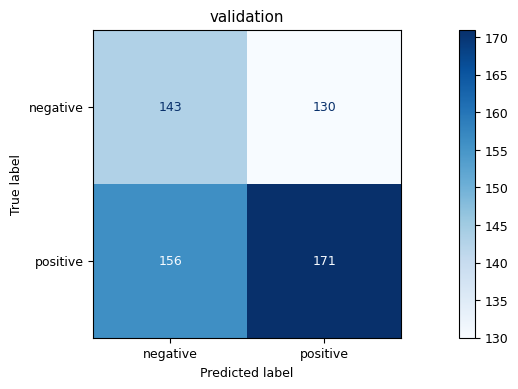

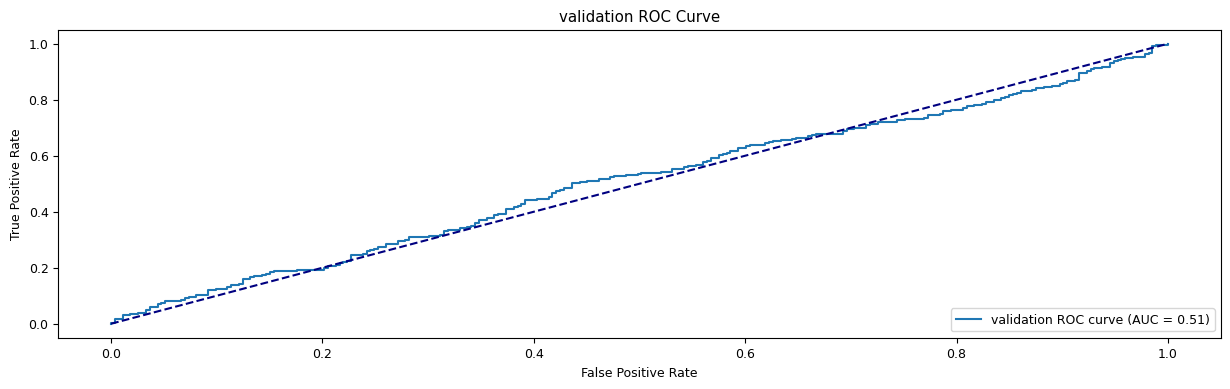

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.550000,0.550371,0.573481,0.561688,0.560143
validation,0.523333,0.568106,0.522936,0.544586,0.506940


In [489]:
lr_model_si = Pipeline([
    ('mapper', mapper),
    ('imputer', IterativeImputer(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear')),
])

lr_model_si.fit(train, train.LUNG_CANCER)

evaluate_model(lr_model_si, set_names=('train', 'validation'), title='Logistic Regression')

**Conclusión**

Para el modelo de Regresión Logística, al aplicar los hiperparámetros óptimos (solver='liblinear' y random_state=42), observamos que la métrica AUC-ROC en los datos de validación se mantiene en 0.507, lo cual indica un desempeño apenas mejor que el azar. La precisión y el recall también mostraron mejoras en los datos de entrenamiento, pero el rendimiento en los datos de validación sigue siendo limitado. Esto sugiere que, aunque el ajuste de hiperparámetros ha sido realizado, el modelo de Regresión Logística podría no ser la mejor opción para este conjunto de datos en términos de capacidad predictiva.

<h4>KNN</h4>

'Knn'

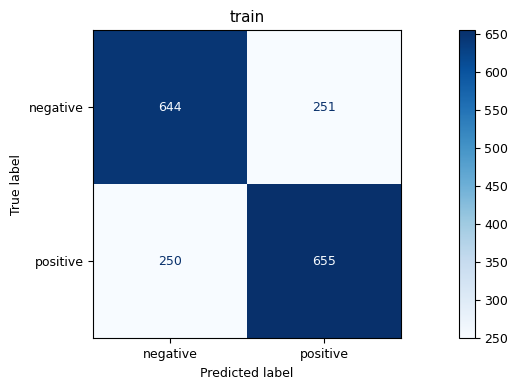

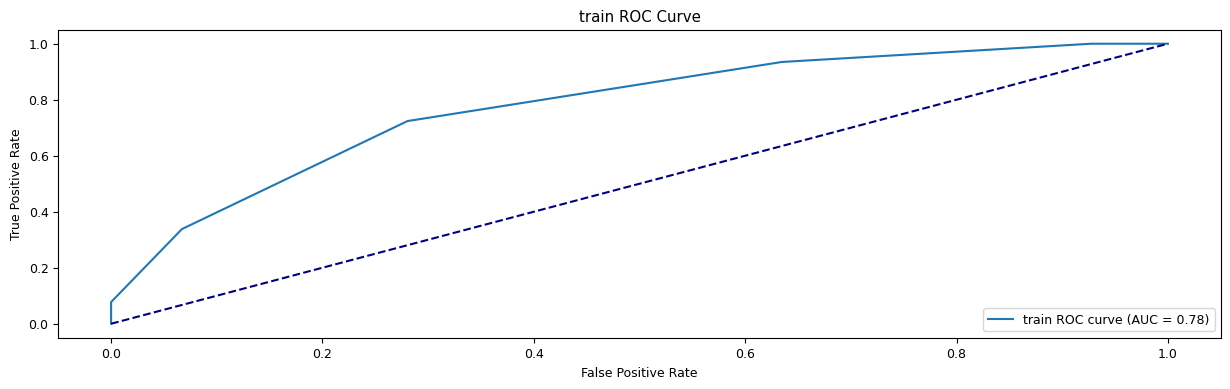

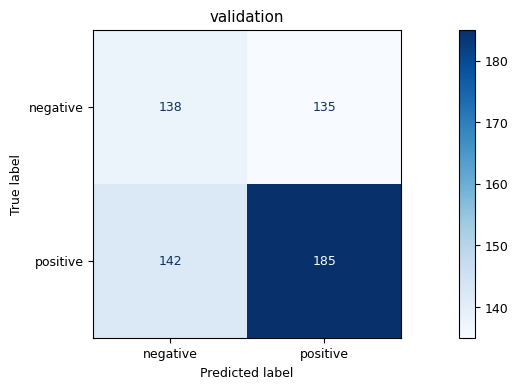

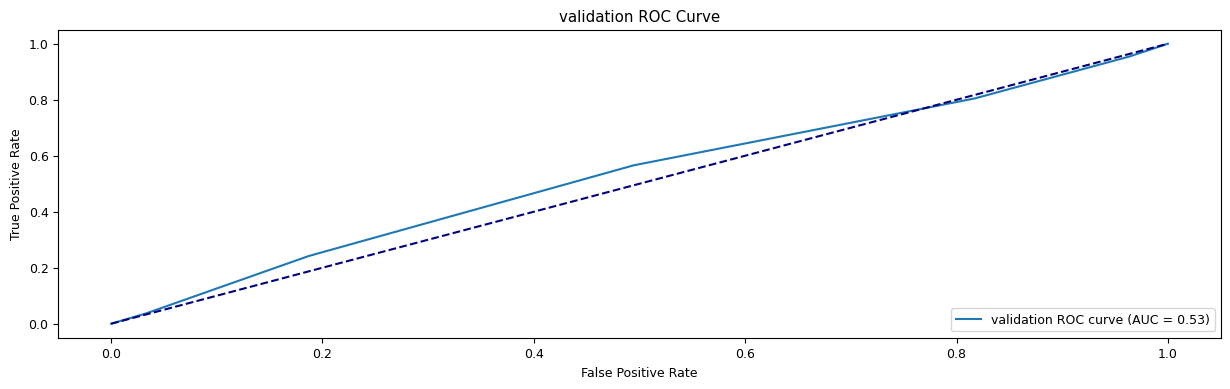

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.721667,0.722958,0.723757,0.723357,0.776777
validation,0.538333,0.578125,0.565749,0.571870,0.531640


In [490]:
knn_model = Pipeline([
    ('mapper', mapper),
    ('classifier', KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')),
])

knn_model.fit(train, train.LUNG_CANCER)

evaluate_model(knn_model, title='Knn', show_cm=True)

**Conclusión**

El modelo KNN, con los hiperparámetros seleccionados (n_neighbors=5 y algorithm='ball_tree'), mostró un buen rendimiento en los datos de entrenamiento con una AUC-ROC de 0.775. Sin embargo, el desempeño en los datos de validación presentó una AUC-ROC de 0.532, lo cual indica que el modelo no generaliza tan bien a los datos no vistos. A pesar de la buena capacidad predictiva en el conjunto de entrenamiento, la mejora en la métrica AUC-ROC en los datos de validación es modesta, sugiriendo que podrían ser necesarias más optimizaciones o diferentes enfoques para mejorar la generalización del modelo.

<h4>Decision Tree</h4>

'Decision Tree'

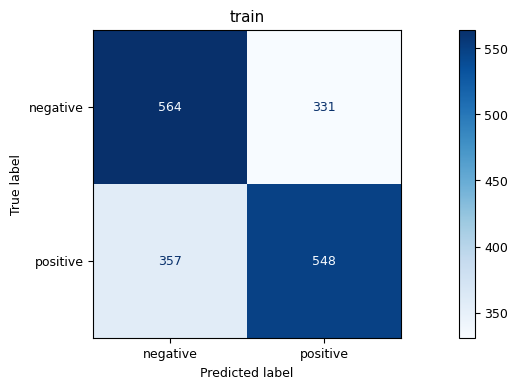

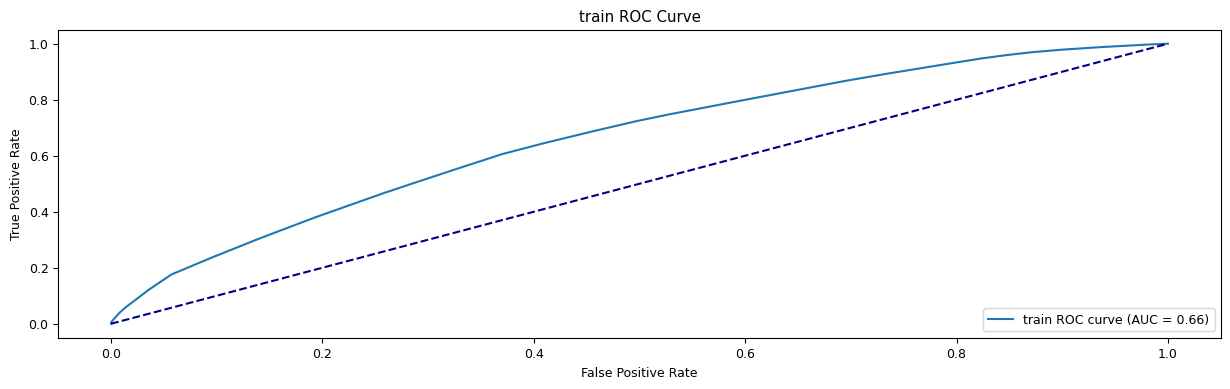

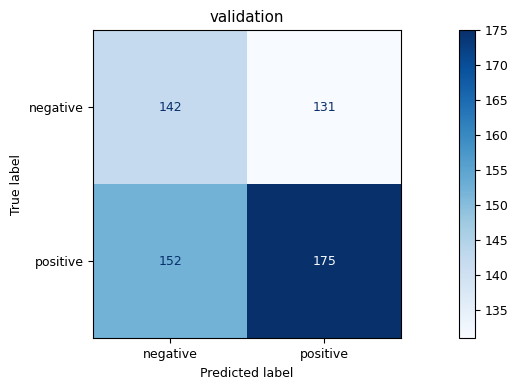

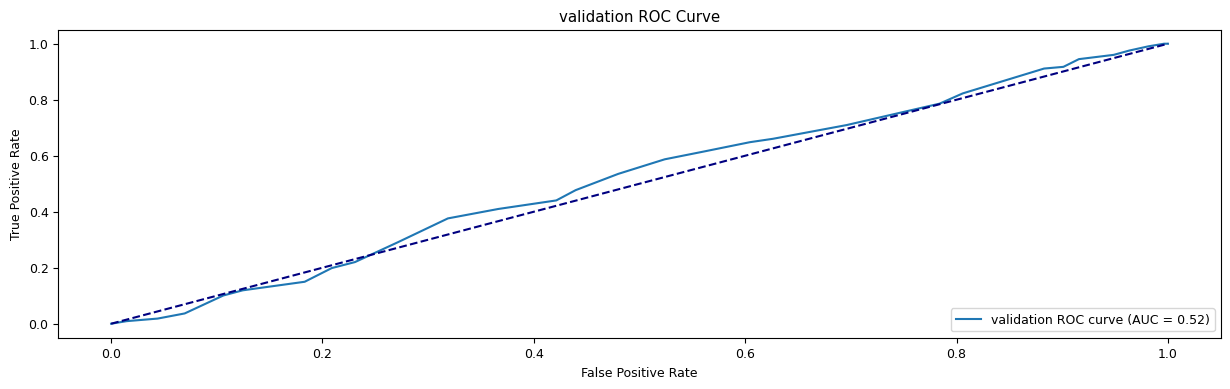

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.617778,0.623436,0.605525,0.614350,0.663072
validation,0.528333,0.571895,0.535168,0.552923,0.518522


In [491]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=456)

dt_model = Pipeline([
    ('mapper', mapper),
    ('classifier', tree_model),
])

dt_model.fit(train, train.LUNG_CANCER)

evaluate_model(dt_model, title='Decision Tree')

**Conclusión**

Para el modelo de Árbol de Decisión, utilizando los hiperparámetros óptimos (max_depth=5 y random_state=456), se observó una AUC-ROC en los datos de validación de 0.519. A pesar de una mejor AUC-ROC en los datos de entrenamiento (0.663), el desempeño en los datos de validación es limitado. Esto sugiere que el modelo de Árbol de Decisión podría estar sobreajustando a los datos de entrenamiento y no está capturando bien la variabilidad de los datos de validación, indicando la necesidad de explorar otros enfoques o técnicas de ajuste para mejorar el desempeño general del modelo.

<h3>d. Experimentacion con técnicas de reduccion de dimensionalidad (PCA).</h3>

In [492]:
from sklearn.decomposition import PCA

'Regresión Logística'

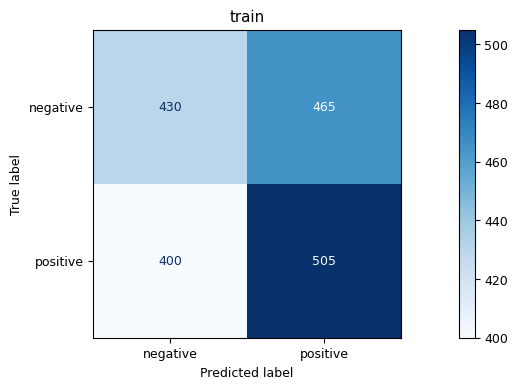

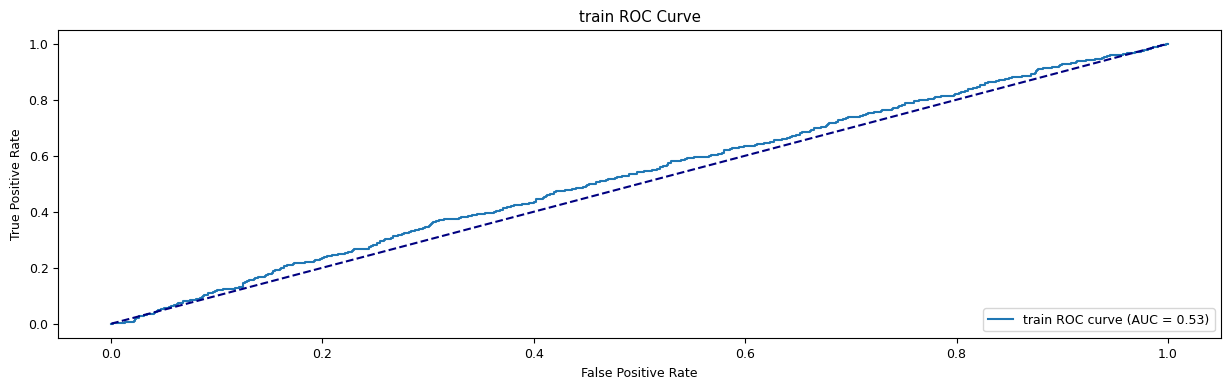

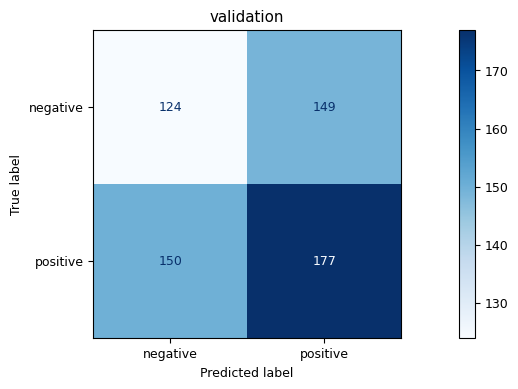

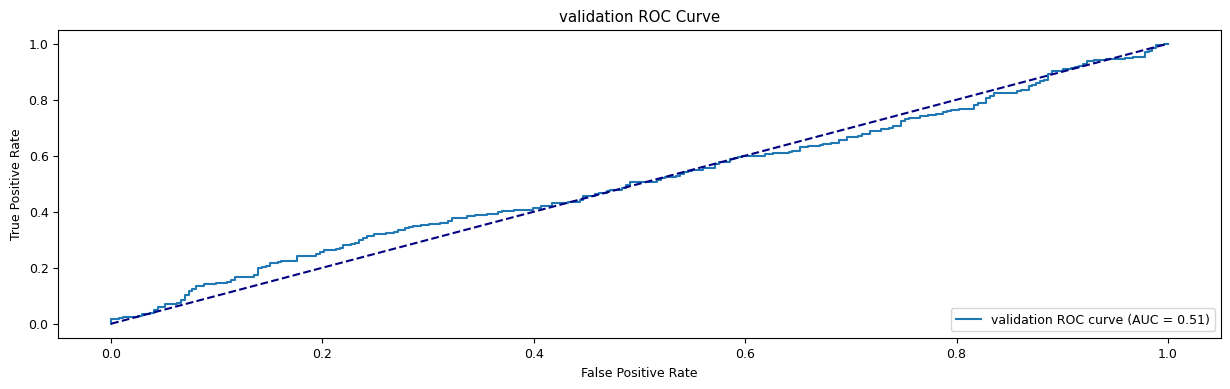

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.519444,0.520619,0.558011,0.538667,0.528432
validation,0.501667,0.542945,0.541284,0.542113,0.508194


In [493]:
# Regresión Logística con reducción a 2 componentes.
lg = LogisticRegression(random_state=42)

Regresión_Logística = Pipeline([('mapper', mapper), 
                                ('pca', PCA(2)),
                                ('classifier', lg)])
Regresión_Logística.fit(train, train.LUNG_CANCER)

evaluate_model(Regresión_Logística, title='Regresión Logística', show_cm=True)

'Knn'

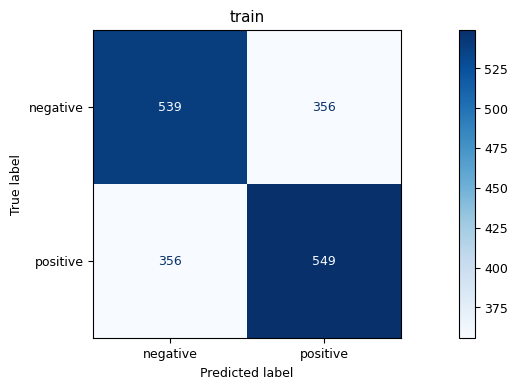

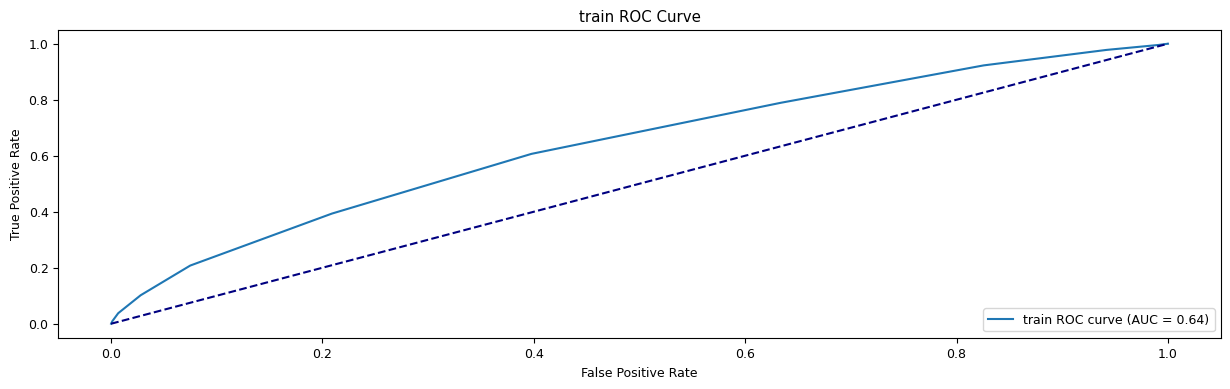

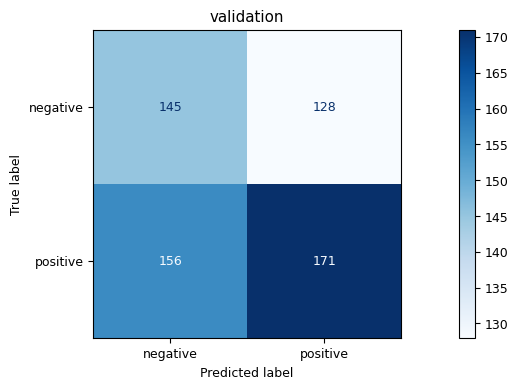

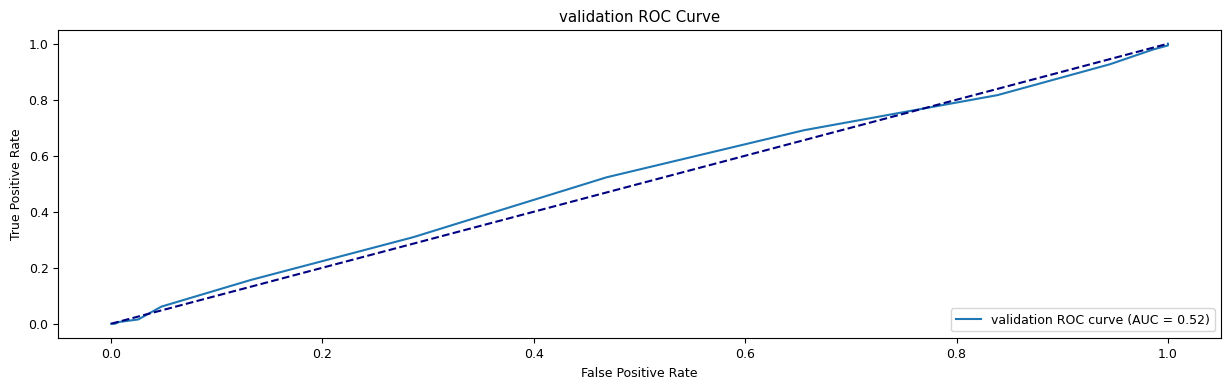

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.604444,0.606630,0.606630,0.606630,0.640409
validation,0.526667,0.571906,0.522936,0.546326,0.519004


In [494]:
# kNN 15 con reducción a 2 componentes.
knn = KNeighborsClassifier(n_neighbors=15)

Modelo_KNN = Pipeline([('mapper', mapper), 
                       ('pca', PCA(2)),
                       ('classifier', knn)])
Modelo_KNN.fit(train, train.LUNG_CANCER)

evaluate_model(Modelo_KNN, title='Knn', show_cm=True)

'Decision Tree'

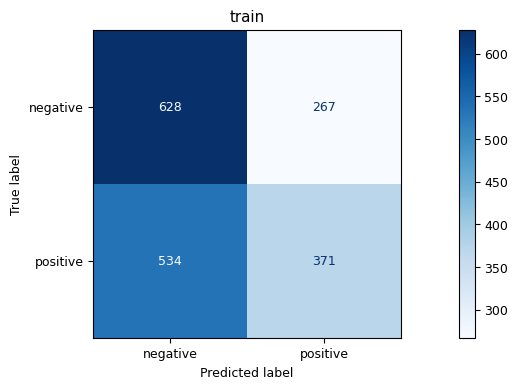

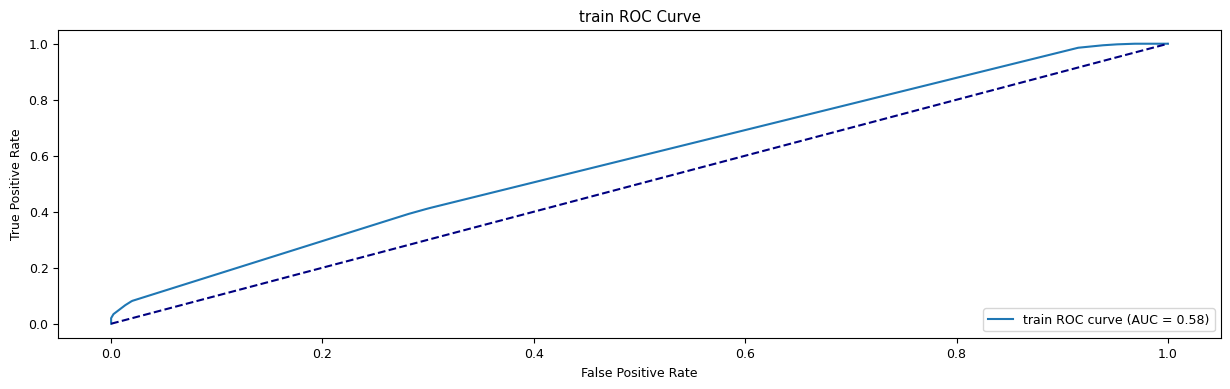

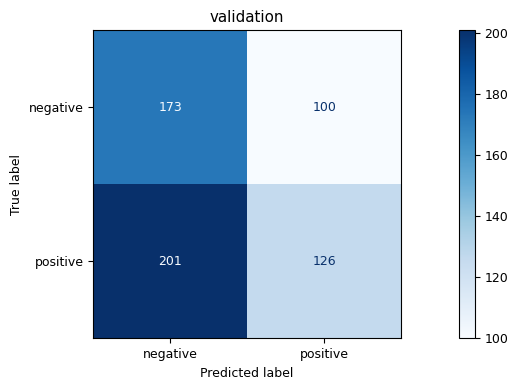

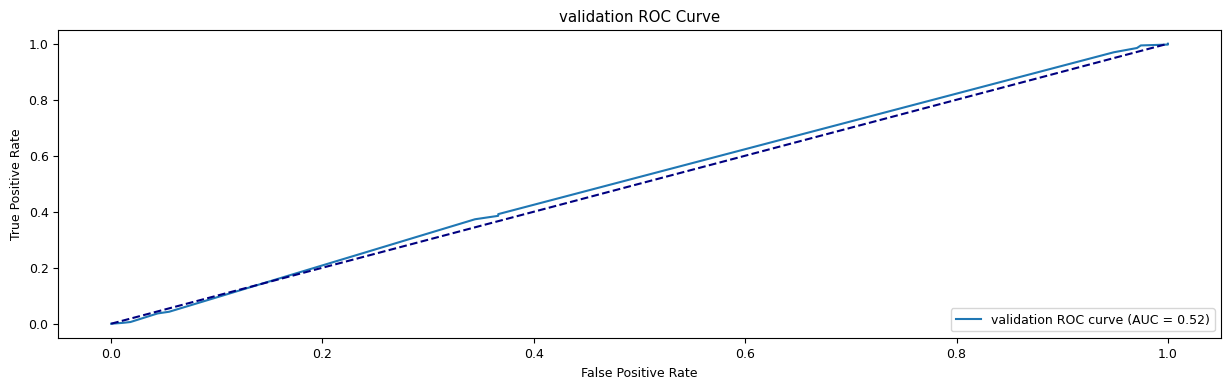

,Accuracy,Precision,Recall,F1,AUC-ROC
train,0.555000,0.581505,0.409945,0.480881,0.584869
validation,0.498333,0.557522,0.385321,0.455696,0.516461


In [495]:
# Decision_tree con reducción a 2 componentes.
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

dt_model = Pipeline([
    ('mapper', mapper),
    ('pca', PCA(2)),
    ('classifier', tree_model),])
dt_model.fit(train, train.LUNG_CANCER)

evaluate_model(dt_model, title='Decision Tree')

**Conclusión**

Al experimentar con la reducción de dimensionalidad mediante PCA, utilizando solo dos componentes principales en un dataset que originalmente contiene múltiples características, hemos observado que esta reducción tan drástica no captura de manera adecuada la variabilidad ni la estructura subyacente de los datos. La pérdida de información clave parece haber afectado negativamente el desempeño de los modelos. Esto se evidencia en los resultados obtenidos, donde las métricas, como la AUC-ROC, no muestran mejoras significativas e incluso tienden a ser inferiores en comparación con los modelos entrenados sin reducción de dimensionalidad.

La disminución a solo dos componentes probablemente ha excluido características importantes y patrones complejos que son esenciales para la generalización del modelo. Este comportamiento se refleja tanto en los datos de entrenamiento como en los de validación, donde los resultados de todos los modelos (Regresión Logística, KNN y Árbol de Decisión) fueron subóptimos, con rendimientos más bajos en comparación con sus versiones originales sin PCA.

Por lo tanto, concluimos que, en este caso particular, reducir a dos dimensiones no es recomendable, ya que no mejora el rendimiento predictivo. Como alternativa, sería prudente probar con un mayor número de componentes en PCA para ver si se logra un equilibrio entre la reducción de dimensionalidad y la preservación de información valiosa. No obstante, mantener el conjunto completo de características, sin aplicar PCA, parece ser una mejor opción para obtener modelos más robustos y predictivos en este contexto.


<h3>e. Determinar el valor final de la métrica para un "cliente" </h3>

Para informar el valor final de la métrica a un cliente, es importante considerar no solo el rendimiento puro del modelo, sino también otros factores clave como la interpretabilidad, los tiempos de entrenamiento y el uso de recursos.

**Selección de la métrica:**

En este caso, la métrica más adecuada para informar podría ser el AUC-ROC, ya que esta mide la capacidad del modelo para distinguir entre clases y es menos sensible a desequilibrios en los datos. El AUC-ROC brinda una visión más completa sobre el rendimiento del modelo en comparación con métricas como precisión o exactitud, que pueden ser engañosas en conjuntos de datos desequilibrados.

**Evaluación del modelo:**

* **Rendimiento del modelo:** Basado en las pruebas realizadas, el modelo de KNN fue el que ofreció un mayor valor de AUC-ROC en comparación con otros modelos, tanto en entrenamiento como en validación.

* **Interpretabilidad:** Aunque KNN es menos interpretativo comparado con modelos como la regresión logística o los árboles de decisión, sigue siendo útil para ciertos tipos de datos. Un aspecto clave es que KNN permite tener una comprensión clara de cómo las instancias cercanas (vecinos) influyen en las predicciones.

* **Tiempos de entrenamiento:** KNN suele tener tiempos de entrenamiento más rápidos, pero a medida que crece el número de muestras, los tiempos de predicción pueden volverse más lentos. En contraste, la regresión logística y los árboles de decisión suelen ser más eficientes en términos de tiempo de inferencia, lo que puede ser un factor importante para el cliente si el modelo necesita aplicarse en tiempo real.

**Conclusión:**

Para el cliente, recomendaría informar el AUC-ROC del modelo KNN, resaltando que, aunque este modelo presentó un buen equilibrio entre rendimiento y tiempo de entrenamiento, podría ser beneficioso evaluar otras opciones dependiendo de las necesidades de la aplicación, especialmente si la interpretabilidad o los tiempos de predicción son factores clave. Si se requiere una interpretación más detallada o tiempos de predicción rápidos, la regresión logística podría ser una opción más adecuada, sacrificando algo de rendimiento.

<h3>f. Visualización de aciertos y errores con el modelo "ganador" </h3>

**Generación de diagramas de dispersión:**

Para analizar los aciertos y errores del modelo KNN, se pueden generar diagramas de dispersión utilizando pares de variables clave del conjunto de datos, como **'AGE'** y **'SMOKING'**, **'GENDER'** y **'ALCOHOL_CONSUMING'**, o **'COUGHING'** y **'CHEST_PAIN'**. En estos diagramas, los puntos pueden ser coloreados según si la predicción fue correcta o incorrecta.

* **Aciertos:** Representan las instancias donde el modelo predijo correctamente si el paciente tenía o no cáncer de pulmón.

* **Errores:** Los puntos donde el modelo falló (falsos positivos y falsos negativos).

**Discusión de patrones:**

* **Falsos positivos:** Se puede observar si los pacientes sin cáncer fueron erróneamente clasificados como si lo tuvieran, y si esto ocurre con mayor frecuencia en grupos de edad o características particulares (por ejemplo, en personas mayores con historial de tabaquismo).

* **Falsos negativos:** Es importante analizar si existe algún patrón en los pacientes con cáncer no detectado. Podría sugerir que el modelo está fallando en capturar características clave o que hay grupos específicos de personas que no siguen las tendencias generales del conjunto de datos.

**Importancia de las variables:**

Aunque KNN no proporciona una medida directa de importancia de las variables como lo hacen los árboles de decisión, es posible realizar un análisis de la relevancia de las características:

Una opción es utilizar técnicas como permute feature importance, donde se mide la variación en el rendimiento del modelo al alterar una variable específica.
Esto puede revelar cuáles son las características más influyentes para las predicciones del modelo. Por ejemplo, si variables como **'AGE'** o **'SMOKING'** tienen un impacto considerable, podemos destacar su relevancia en la identificación de patrones que influyen en la detección de cáncer de pulmón.

**Conclusión:**

El análisis visual de los aciertos y errores puede ayudar a identificar patrones o grupos donde el modelo tiene dificultades. Si se encuentran patrones consistentes en los errores, se podría ajustar el modelo o incorporar nuevas características para mejorar la precisión. Además, conocer la importancia de las variables permite entender mejor las limitaciones del modelo y áreas donde podría fallar en la generalización.